# Exercício 1

Não copie códigos prontos para os itens abaixo!

(a) Implemente o algoritmo ingênuo (indo até raiz de n) para testar primalidade em uma função primo_simples(n).

(b) Implemente o teste de Fermat em uma função primo_fermat(n), não esqueça de usar **repeated squaring** para calcular a potência.

PSEUDOCÓDIGO 
primo_fermat(n):
- sorteie um valor $x$ de $1$ a $n-1$ aleatoriamente com distribuição uniforme.
- se $x^{n-1} \not\equiv 1$ (mod $n)$ retorne "composto"
- caso contrário retorne "provavelmente primo"

(c) Implemente o teste de Miller-Rabin em uma função primo_mr(n), não esqueça de usar **repeated squaring** para calcular as potências.

PSEUDOCÓDIGO 
primo_mr(n):
- se $n$ é par e $n>2$ então returne "composto"
- Encontre o maior valor possível de $s$ tal que $n-1 = 2^s t$.
- sorteie um valor $x$ de $1$ a $n-1$ aleatoriamente com distribuição uniforme.
- Calcule as potências $x^t, x^{2t}, x^{4t},x^{8t},..., x^{2^st}=n-1$.
- se $x^{n-1} \not\equiv 1$ (mod $n$) retorne "composto"
- para cada $i$ de $0$ a $n-2$:
    - se $x^{2^i t} \not\equiv \pm 1$ (mod $n$) e $x^{2^{i+1} t} \equiv 1$ (mod $n$), então retorne "composto" 
- retorne "provavelmente primo"

(c) Faça diversos testes usando as três funções acima para comparar o tempo de execução. Faça um gráfico com os tempos de execução.

(d) Faça diversos testes usando a função do item (c) para números compostos e verifique a média de tentativas até obter a resposta correta. Sugira um número de vezes que devemos rodar o primo_mr(n) para obter uma boa probabilidade de acerto. Justifique.


# Exercicio a

In [3]:
def primo_simples(n):
         
    for numero in range(2,int(np.sqrt(n))):
        
        if(n%numero == 0):
      
            return False
    
    return True

# Exercicio b

In [4]:
import random
import numpy as np

def primo_fermat(n):
    if n == 2:
        return True

    if n % 2 == 0:
        return False
    
    a = random.randrange(1, n-1)
    #x = np.power(a,n-1)
    
    if pow(a,n-1,n) != 1:
        return False
    
    
    return True

# Exercicio c

In [5]:
def primo_mr(n, k):
    
    if n == 2:
        return True

    if n % 2 == 0:
        return False

    r, s = 0, n - 1
    while s % 2 == 0:
        r += 1
        s //= 2
        
    for i in range(k):
        a = random.randrange(2, n - 1)
        x = pow(a, s, n)
        if x == 1 or x == n - 1:
            continue
        for _ in range(r - 1):
            x = pow(x, 2, n)
            if x == n - 1:
                break
        else:
            return False
    return True

In [6]:
#teste
n = 104729
if primo_simples(n) == True:
    print("Provavelmente primo")
else:
    print("Composto")
if primo_fermat(n) == True:
    print("Provavelmente primo")
else:
    print("Composto")
    
if primo_mr(n,1) == True:
    print("Provavelmente primo")
else:
    print("Composto")
    

Provavelmente primo
Provavelmente primo
Provavelmente primo


# Exercicio d

In [11]:
import time
import matplotlib.pyplot as plt

time1 = []
time2 = []
time3 = []
ns = []

for i in range(150):
    
    n = random.randint(2,100000)
    
    ns.append(n)
    
    start = time.time()
    
    primo_simples(n)
    
    end = time.time()

    elapsed = end - start
    
    time1.append(elapsed)
    
    
    
    
    start = time.time()
    
    primo_fermat(n)
    
    end = time.time()

    elapsed = end - start
    
    time2.append(elapsed)
    
    
    
    
    start = time.time()
    
    primo_mr(n,1)
    
    end = time.time()

    elapsed = end - start
    
    time3.append(elapsed)
    

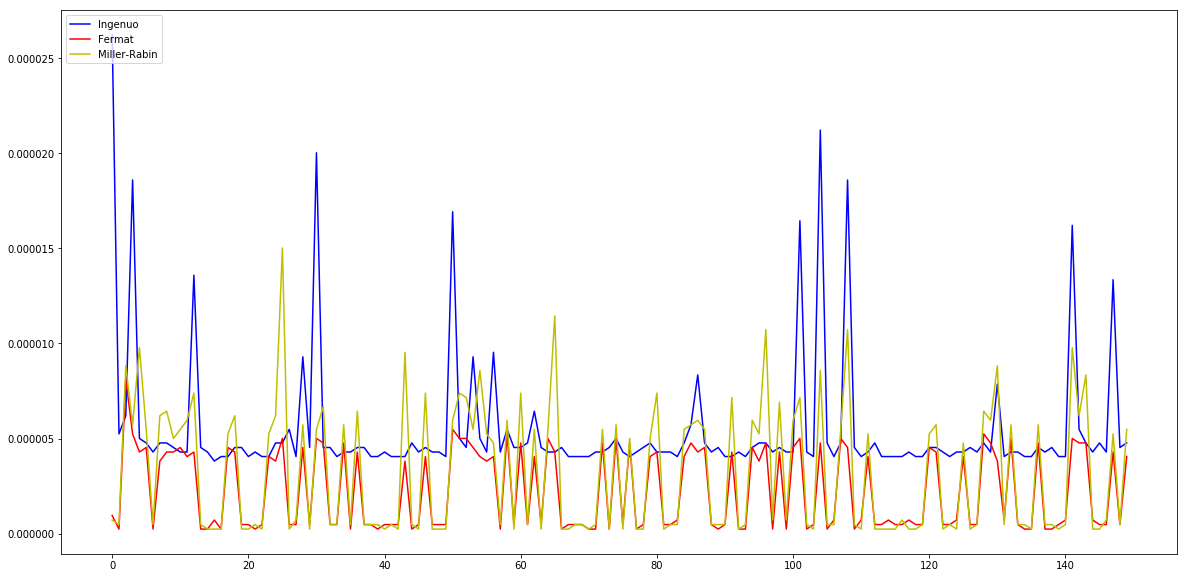

In [12]:
plt.figure(figsize=(20,10))
plt.plot(time1,'b-', label = "Ingenuo")
plt.plot(time2,'r-', label = "Fermat")
plt.plot(time3, 'y-', label = "Miller-Rabin")
#plt.ylim(0, 0.00001)
plt.legend(loc='upper left')
plt.show()

# Grafico 1: numero da instancia X tempo

# Grafico 1: Podemos ver que o método de Miller e de Fermat se mantem constantes e com um baixo tempo de execução, porém o método de miller apresentou picos mais altos. O método ingenuo foi o que apresentou os picos mais altos de tempo de execução e teve seu tempo médio superior se comparado aos outros.

# Exercicio e

In [46]:
compostos = [28, 30, 32, 33, 34, 35, 36, 38, 39, 40, 42, 44, 45, 46, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 60, 62, 63, 64, 65, 66, 68, 69, 70, 72, 74, 75, 76, 77, 78, 80, 81, 82, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100, 102, 104, 105, 106, 108, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 996,993,921,354,440,296,614,729,133,469,31993,34131,52365,95085,103215,104241,104581,104719, 104728]
tentativas = []

for i in range(len(compostos)):
    t = 1
    resp = primo_mr(compostos[i],1)
    
    while resp != False:
        resp = primo_mr(compostos[i],1)
        t+=1    
    tentativas.append(t)

print(tentativas)
print("Media de tentativas: ", np.mean(tentativas)," Variancia", np.var(tentativas),)

print("Quantidade de numeros testados: ", len(compostos), ". No intervalo de ",compostos[0]," a ", compostos[len(compostos)-1])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Media de tentativas:  1.03  Variancia 0.0291
Quantidade de numeros testados:  100 . No intervalo de  28  a  104728


# A media de tentativas foi de 1.03

## Vamos definir $p$ como a probabilidade de uma tentativa nao identificar $n$ como composto. o estimador para $p$ é dado por $p' = \frac{\text{ numero de casos favoraveis}}{n} = \frac{3}{100} = 0.03$

## Logo, a probabilidade de $2$ tentativas não identificarem um número composto é dada por $(0.03)^2$. O que nos dá uma probabilidade $1-(0.03)^2 = 0.99$ de identificar um número composto com $2$ tentativas. Lembrando que esses resultados foram obtidos para a nossa amostra que não é ideal, possui relativamente poucos elementos amostrais e números compostos extraídos de um range pequeno e não-aleatório.